In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
#from load_data import load_categorical_more_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
import time
import seaborn as sns
from xgboost import XGBRegressor


In [5]:
import openpyxl 
import os

In [6]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [8]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2021,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

#affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [59]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
#data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
#data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [60]:
data_table.columns

Index(['Total_owed_a_prevention_or_relief_duty',
       'Number_of_households_in_area4(000s)', 'Total_secured_accommodation',
       'Homeless_(including_intentionally_homeless)',
       'Size_of_social_housing_waiting_list_2021', '2021_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Total_Affordable(Starts_on_Site)', 'Affordable_Rent(Completions)',
       'Social_Rent(Completions)', 'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Total(Starts_on_Site)',
       'Total(Completions)', 'Market(Starts_on_Site)', 'Market(Completions)',
       'A_B_property_counts', 'C_D_property_counts', 'E_F_property_counts',
       'G_H_property_counts', 'median_houses_2020', 'median_earning_2020',
       'ratio_by_medians_2020', 'lower_quatile_houses_2020',
       'lower_quatile_earni

In [61]:
feature_space = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [62]:
data_table.head(5)

,Total_owed_a_prevention_or_relief_duty,Number_of_households_in_area4(000s),Total_secured_accommodation,Homeless_(including_intentionally_homeless),Size_of_social_housing_waiting_list_2021,2021_Total_Lettings,Affordable_Rent(Starts_on_Site),Social_Rent_(Starts_on_Site),Intermediate_Rent_(Starts_on_Site),Affordable_Home_Ownership(Starts_on_Site),...,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,median_houses_2020,median_earning_2020,ratio_by_medians_2020,lower_quatile_houses_2020,lower_quatile_earning_2020,ratio_by_lower_quatile_2020
1,986,57.078,278,25,4884,548,37,0,0,12,...,44130,16370,3490,590,134000,25849,5.18,84995,20670,4.11
2,522,62.919,138,7,2926,491,47,0,0,3,...,40330,20130,4420,430,132500,26912,4.92,94995,20424,4.65
3,2199,82.989,1044,25,4653,551,13,0,0,41,...,52290,26150,8740,1530,148000,29495,5.02,106400,21755,4.89
4,711,48.31,139,18,1415,313,36,0,0,27,...,33820,13020,4520,650,144950,27087,5.35,99950,19383,5.16
5,1796,91.296,459,87,4893,304,102,2,49,69,...,47670,31330,12100,2880,195000,29986,6.5,137000,20503,6.68


In [63]:
feature_space.columns

Index(['Number_of_households_in_area4(000s)', 'Total_secured_accommodation',
       'Homeless_(including_intentionally_homeless)',
       'Size_of_social_housing_waiting_list_2021', '2021_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Total_Affordable(Starts_on_Site)', 'Affordable_Rent(Completions)',
       'Social_Rent(Completions)', 'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Total(Starts_on_Site)',
       'Total(Completions)', 'Market(Starts_on_Site)', 'Market(Completions)',
       'A_B_property_counts', 'C_D_property_counts', 'E_F_property_counts',
       'G_H_property_counts', 'median_houses_2020', 'median_earning_2020',
       'ratio_by_medians_2020', 'lower_quatile_houses_2020',
       'lower_quatile_earning_2020', 'ratio_by_lower_quatile_2020'],
      d

In [64]:
# sns.pairplot(data_table)

In [65]:
# SelectKBest(chi2, k=8).fit_transform(feature_space, feature_class)

In [66]:

# data_scaled = StandardScaler().fit_transform(data_table.values)
# data_scaled_df = pd.DataFrame(data_scaled, index=data_table.index, columns=data_table.columns)


In [84]:
X = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
y = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [86]:
xgb_model = XGBRegressor().fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6684870381249521


In [70]:
thresholds = np.sort(xgb_model.feature_importances_)
print(thresholds)

[1.7457751e-08 5.8369760e-06 4.9987604e-04 7.3083612e-04 8.9255429e-04
 9.7709836e-04 1.7019943e-03 2.2204269e-03 2.3287795e-03 3.0905281e-03
 3.1606671e-03 3.3850630e-03 3.7674224e-03 4.6807313e-03 5.7717445e-03
 5.8500902e-03 6.4696032e-03 6.5119294e-03 7.3434855e-03 7.5488426e-03
 8.3775045e-03 1.2055366e-02 3.5614945e-02 8.8108666e-02 1.1013491e-01
 1.2524208e-01 1.4817129e-01 1.8771106e-01 2.1764658e-01]


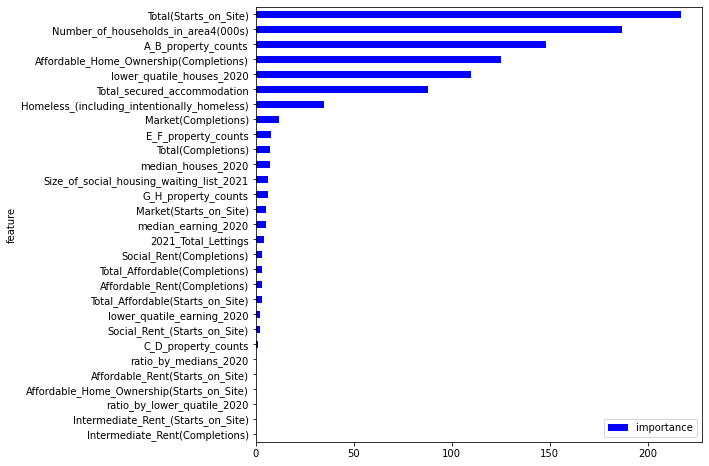

In [71]:
importances_values = xgb_model.feature_importances_
importances = pd.DataFrame(importances_values, columns=["importance"])
feature_data = pd.DataFrame(X_train.columns, columns=["feature"])
importance = pd.concat([feature_data, importances], axis=1)

importance = importance.sort_values(["importance"], ascending=True)
importance["importance"] = (importance["importance"] * 1000).astype(int)
importance = importance.sort_values(["importance"])
importance.set_index('feature', inplace=True)
importance.plot.barh(color='b', rot=0, figsize=(8, 8))
plt.legend(loc="lower right")
plt.show()